Since you can program and have a background in life sciences you have been hired by a company developing video games to implementing a simulated ecology in a new game. The game takes place in a virtual 100 square meter area. The ecology in the game should consist of 3 major players. Carrots, rabits and wolfes.

Carrots spawn randomly on every square meter with a chance of 20% per round and can accumulate until there are 10 carrots. Every 

In [1]:
class GameObject():
    def __init__(self, location=None):
        if location is None:
            self.location = [random.randint(0,100), random.randint(0,100)]
        else:
            self.location = location
            
    def move():
        pass
    
    def eat():
        pass
    
    def multiply():
        pass

class Wolf(GameObject):
    def __init__(self, location=None):
        super().__init__(location)
        self.color = "gray"
        self.hunger = 5
    
        
class Rabit(GameObject):
    def __init__(self, location=None):
        super().__init__(location)
        self.color = "green"
        self.hunger = 5
        
class Carrot(GameObject):
    def __init__(self, location=None):
        super().__init__(location)
        self.color = "orange"
         

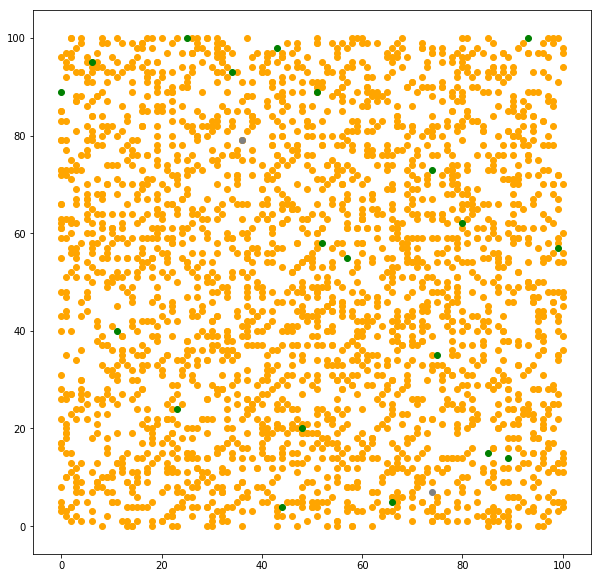

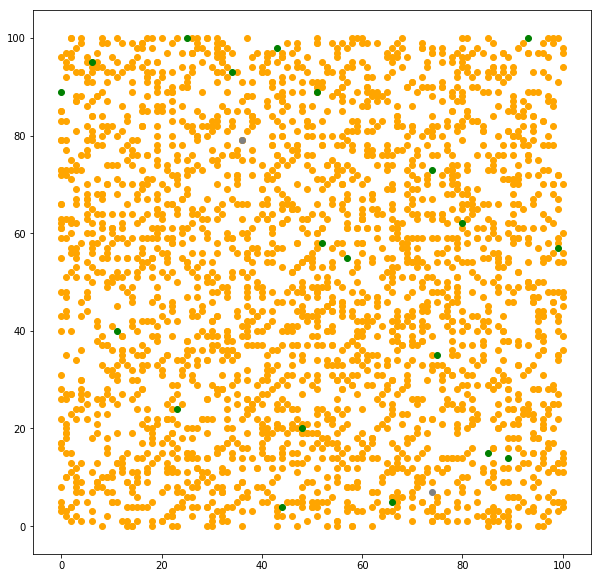

In [6]:
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt
import random
class GameGrid():
    def __init__(self, n_carrots=100, n_rabits=20, n_wolfes=2):
        self.size = (100,100)
        self.fields = self.size[0] * self.size[1]
        
        self.plot_fig, self.plot_ax = plt.subplots(1,1, figsize=(10,10))
        
        self.wolfes =[]
        [self.create_wolf() for _ in range(n_wolfes)]        
        self.rabits = []
        [self.create_rabit() for _ in range(n_rabits)]
        self.carrots = []
        [self.create_carrot() for _ in range(n_carrots)]
        
        #self.plot_fig.show()
        self.show()
        
        
    def create_wolf(self):
        self.wolfes.append(Wolf())
    
    def create_rabit(self):
        self.rabits.append(Rabit())
    
    def create_carrot(self):
        self.carrots.append(Carrot())
    
    def show(self):
        self.plot_ax.clear()
        for objects in [self.carrots, self.rabits, self.wolfes]:
            self.plot_game_objects(objects)
        
        display.clear_output(wait=True)
        display.display(plt.gcf())
        
    def plot_game_objects(self, objs):
        for obj in objs:
            self.plot_ax.scatter(obj.location[0], obj.location[1], color=obj.color)
    
    def run(self, carrot_rate=0.05):
        # Spawn carrots
        [self.create_carrot() for _ in range(int(self.fields*carrot_rate))]
        
        # Rabit actions
        
        # Wolf actions
        
        # Show current state
        self.show()
        
game = GameGrid()
for i in range(5):
    game.run()